In [1]:
import pandas as pd
import numpy as np

In [3]:
df= pd.read_csv ("covid_data.csv")

In [4]:
df.shape

(429435, 67)

In [5]:
# 1. Si richiede di verificare le dimensioni del dataset e i relativi metadati

In [6]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [7]:
df.info

<bound method DataFrame.info of        iso_code continent     location        date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan  2020-01-05          0.0        0.0   
1           AFG      Asia  Afghanistan  2020-01-06          0.0        0.0   
2           AFG      Asia  Afghanistan  2020-01-07          0.0        0.0   
3           AFG      Asia  Afghanistan  2020-01-08          0.0        0.0   
4           AFG      Asia  Afghanistan  2020-01-09          0.0        0.0   
...         ...       ...          ...         ...          ...        ...   
429430      ZWE    Africa     Zimbabwe  2024-07-31     266386.0        0.0   
429431      ZWE    Africa     Zimbabwe  2024-08-01     266386.0        0.0   
429432      ZWE    Africa     Zimbabwe  2024-08-02     266386.0        0.0   
429433      ZWE    Africa     Zimbabwe  2024-08-03     266386.0        0.0   
429434      ZWE    Africa     Zimbabwe  2024-08-04     266386.0        0.0   

        new_cases_smoothed  tot

In [13]:
df.dtypes

iso_code                                    object
continent                                   object
location                                    object
date                                        object
total_cases                                float64
                                            ...   
population                                   int64
excess_mortality_cumulative_absolute       float64
excess_mortality_cumulative                float64
excess_mortality                           float64
excess_mortality_cumulative_per_million    float64
Length: 67, dtype: object

In [15]:
# 2.a il numero di casi fin dall'inizio della pandemia

In [17]:
Total_per_continent= df.groupby("location") ["new_cases"].sum()

In [19]:
print (Total_per_continent)

location
Afghanistan          235214.0
Africa             13146831.0
Albania              335047.0
Algeria              272139.0
American Samoa         8359.0
                     ...     
Western Sahara            0.0
World             775935057.0
Yemen                 11945.0
Zambia               349842.0
Zimbabwe             266387.0
Name: new_cases, Length: 255, dtype: float64


In [21]:
World_df=df.loc[df["location"]=="World"]

In [23]:
total_world=(World_df["new_cases"].sum()) #totale casi nella location mondo

In [25]:
print(total_world)  #totale casi nella location mondo

775935057.0


In [27]:
Total_cases= World_df ["total_cases"].iloc[-1] #totale casi nella location mondo (ultimo num di total cases dato che è una somma progressiva)

In [29]:
print (Total_cases)

nan


In [31]:
World_df.dropna(subset=["total_cases"],inplace=False) ["total_cases"].iloc[-1]

775866783.0

In [33]:
# 2.b b. la percentuale rispetto al totale mondiale del numero di casi

In [35]:
df['percentage_of_world_cases'] = (df['total_cases'] / total_world) * 100


In [37]:
print(df['percentage_of_world_cases'])

0         0.000000
1         0.000000
2         0.000000
3         0.000000
4         0.000000
            ...   
429430    0.034331
429431    0.034331
429432    0.034331
429433    0.034331
429434    0.034331
Name: percentage_of_world_cases, Length: 429435, dtype: float64


In [39]:
#3 Selezionare i dati relativi all'Italia nel 2022 e mostrare con dei grafici adeguati: 
#a. l'evoluzione del casi totali dall'inizio alla fine dell'anno

In [41]:
df['date'] = pd.to_datetime(df['date'])


In [43]:
df['year'] = df['date'].dt.year

In [45]:
italy_2022 = df.groupby(['location', 'year']).get_group(('Italy', 2022))

In [47]:
import matplotlib.pyplot as plt


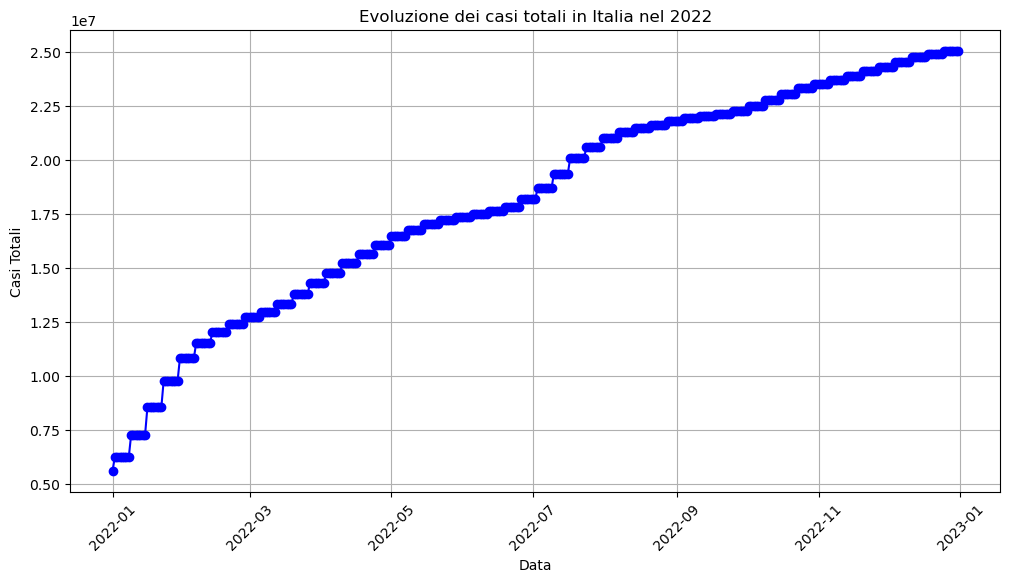

In [48]:
plt.figure(figsize=(12, 6))
plt.plot(italy_2022['date'], italy_2022['total_cases'], marker='o', linestyle='-', color='blue')
plt.title('Evoluzione dei casi totali in Italia nel 2022')
plt.xlabel('Data')
plt.ylabel('Casi Totali')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [50]:
#b. il numero di nuovi casi rispetto alla data

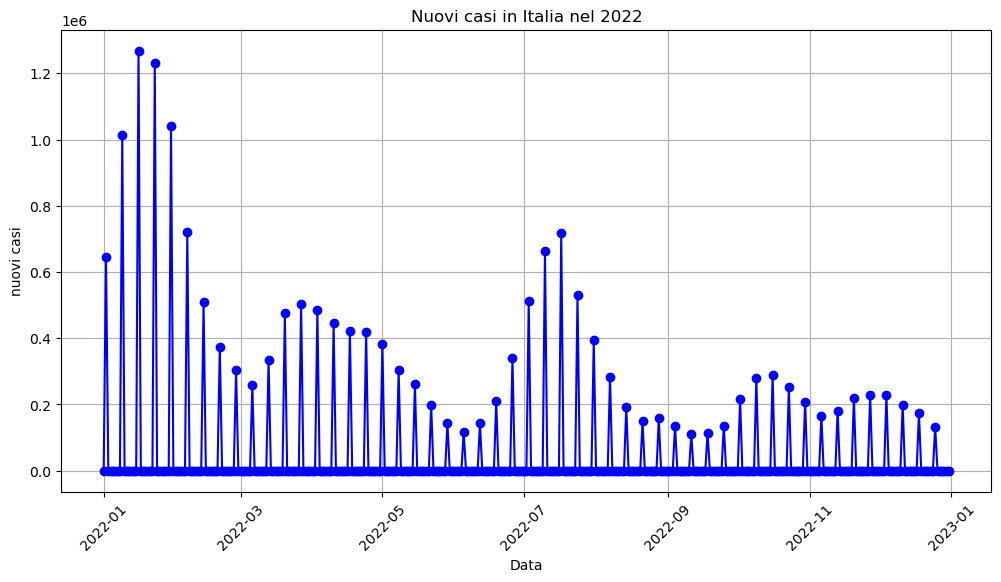

In [53]:
plt.figure(figsize=(12, 6))
plt.plot(italy_2022['date'], italy_2022['new_cases'], marker='o', linestyle='-', color='blue')
plt.title('Nuovi casi in Italia nel 2022')
plt.xlabel('Data')
plt.ylabel('nuovi casi')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [55]:
#k poiché i nuovi casi vengono registrati settimanalmente, filtrare via i dati che non hanno misurazioni

In [65]:
df['date'] = pd.to_datetime(df['date'])


In [67]:
df_italy_2022 = df[(df['location'] == 'Italy') & (df['date'].dt.year == 2022)]


In [69]:
df_italy_2022_filtered = df_italy_2022.dropna(subset=['new_cases'])
df_italy_2022_filtered = df_italy_2022_filtered[df_italy_2022_filtered['new_cases'] > 0]


In [71]:
df_italy_2022_filtered['week'] = df_italy_2022_filtered['date'].dt.to_period('W').astype(str)
weekly_cases_italy_2022 = df_italy_2022_filtered.groupby('week')['new_cases'].sum().reset_index()


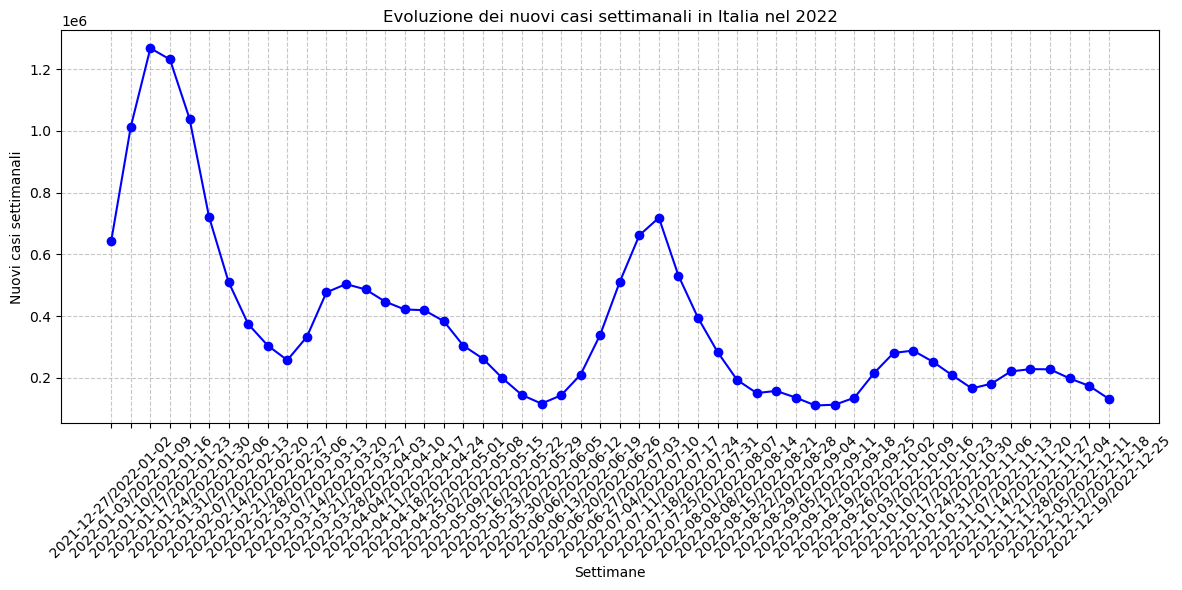

In [75]:
plt.figure(figsize=(12, 6))
plt.plot(weekly_cases_italy_2022['week'], weekly_cases_italy_2022['new_cases'], marker='o', linestyle='-', color='b')
plt.title('Evoluzione dei nuovi casi settimanali in Italia nel 2022')
plt.xlabel('Settimane')
plt.ylabel('Nuovi casi settimanali')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

In [ ]:
#4.Riguardo le nazioni di Italia, Germania e Francia mostrare in un boxplot la differenza tra queste nazioni riguardo il numero di pazienti in terapia intensiva (Intensive Care Unit, ICU) da maggio 2022 (incluso) ad aprile 2023 (incluso)

<Figure size 1000x600 with 0 Axes>

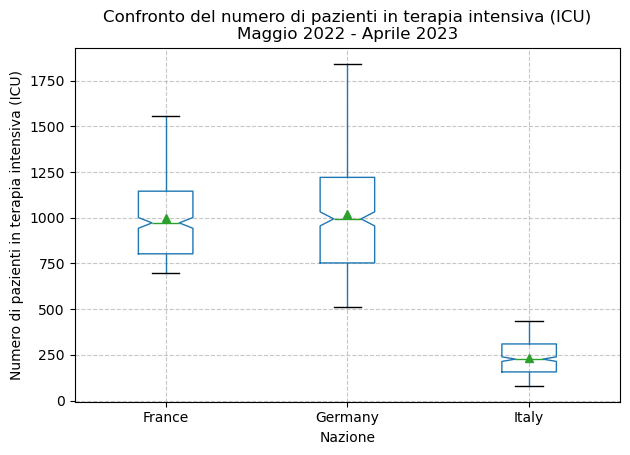

In [77]:
start_date = '2022-05-01'
end_date = '2023-04-30'
countries = ['Italy', 'Germany', 'France']

df_filtered = df[(df['location'].isin(countries)) & 
                 (df['date'] >= start_date) & 
                 (df['date'] <= end_date) &
                 (~df['icu_patients'].isnull())]
plt.figure(figsize=(10, 6))
df_filtered.boxplot(column='icu_patients', by='location', grid=False, showmeans=True, notch=True)
plt.title('Confronto del numero di pazienti in terapia intensiva (ICU)\nMaggio 2022 - Aprile 2023')
plt.suptitle('')  # Rimuovere il titolo automatico
plt.xlabel('Nazione')
plt.ylabel('Numero di pazienti in terapia intensiva (ICU)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

In [79]:
#in Germania si nota che c'è stato il picco piu alto di pazienti in terapia intensiva nel periodo assegnato.

In [ ]:
# L'italia rimane tra le 3 quella col minor numero e con un alta concentrazione vicino alla media

In [ ]:
#5.Riguardo le nazioni di Italia, Germania, Francia e Spagna in tutto il 2023:mostrare la somma dei pazienti ospitalizzati per ognuna

In [91]:
countries = ['Italy', 'Germany', 'France', 'Spain']
df_2023 = df[(df['location'].isin(countries)) & (df['date'].dt.year == 2023)]

In [93]:
hospitalized_sum = df_2023.groupby('location')['hosp_patients'].sum().reset_index()


In [95]:
print(hospitalized_sum)

  location  hosp_patients
0   France      1382574.0
1  Germany            0.0
2    Italy      1175272.0
3    Spain       354602.0


In [101]:
# notiamo come la germania abbia dati nulli e vedendo il boxplot del punto prima sicuramente ci sono state persone ricoverate

In [103]:
# avendo zero dati a disposizione è difficile fare una sostituzione puntuale del dato.
# Si potrebbe fare una media degli altri 3 ma non sarebbe attendibile a mio avviso. Dato che dal boxplot di prima si vede come la Germania sia stata 
# il paese più alto nel numero di ricoveri in terapia intensiva.
